In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

% matplotlib inline

In [4]:
import Utils

d:\program files\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
class FashionDataset(Utils.Dataset):
    # count - int, images in the dataset
    def initDB(self, count, start = 0):
        self.start = start
        self.rootpath = '../../croped_data/train'

        csv_handle = pd.read_csv(os.path.join(self.rootpath,'Annotations/train.csv'))
        # all_images = csv_handle['image_id'].tolist()

        assert start < len(csv_handle), 'the number of start must less than image num'
        assert count < len(csv_handle), 'the number of count must less than image num'

        classes = csv_handle['image_category'].unique().tolist()

        # Add classes
        self.classes = {}
        for k,c in enumerate(classes):
            self.add_class("Landmark",k+1,c)
            self.classes[k+1] = c

        k = 0
        for row in csv_handle.iterrows():
            if k >= count:
                break
            r = row[1]
            split_axis = r.ix[2:].str.split(pat='_', expand=True)
            split_axis.columns = ['x', 'y', 'vis']
            split_axis.loc[split_axis['vis']!='-1','x'] = np.array(split_axis[split_axis['vis']!='-1']['x'])
            split_axis.loc[split_axis['vis']!='-1','y'] = np.array(split_axis[split_axis['vis']!='-1']['y'])

            point_x = np.array(split_axis.loc[split_axis['vis']!='-1','x'].tolist(),dtype='float32')
            point_y = np.array(split_axis.loc[split_axis['vis']!='-1','y'].tolist(),dtype='float32')

            x1 = point_x.min()
            x2 = point_x.max()
            y1 = point_y.min()
            y2 = point_y.max()

            self.add_image(source="Landmark",image_id=k, 
                path=os.path.join(self.rootpath, r['image_id']), width=512, height=512, bboxes=(y1,x1,y2,x2), category=r['image_category'])
            k += 1

    # read image from file and get the 
    def load_image(self, image_id):
        info = self.image_info[image_id]
        # tempImg = image.img_to_array( image.load_img(info['path']) )
        tempImg = np.array(Image.open( os.path.join(self.rootpath, info['path']) ))
        return tempImg

    def get_keys(self, d, value):
        return [k for k,v in d.items() if v == value]

    def load_bbox(self, image_id):
        info = self.image_info[image_id]
        bboxes = [info['bboxes']]
        labels = [self.get_keys(self.classes, info['category'])]
        return np.array(bboxes), np.array(labels)

In [6]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [20]:
dataset_train = FashionDataset()
dataset_train.initDB(1000)
dataset_train.prepare()

d:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [23]:
Img = dataset_train.load_image(1)
bbox,label = dataset_train.load_bbox(1)

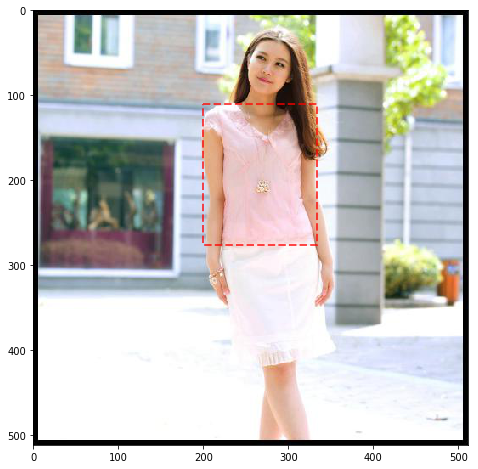

In [25]:
plt.clf()

(y1, x1, y2, x2) = bbox[0]

p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                      alpha=0.7, linestyle="dashed",
                      edgecolor="red", facecolor='none')
ax = get_ax(1)
ax.add_patch(p)
ax.imshow(Img)

d:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


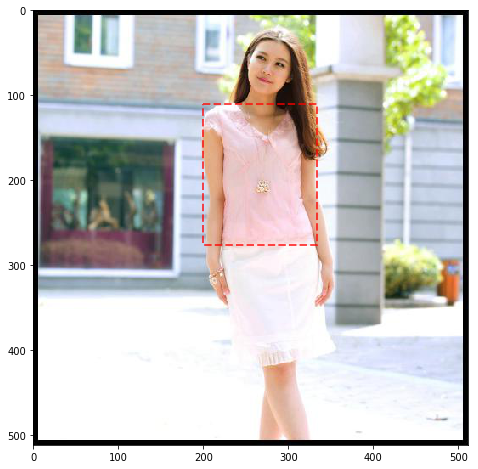

In [39]:
plt.clf()
r = row[1]
fileName = r['image_id']
Img = np.array(Image.open(os.path.join(rootpath, fileName)))

split_axis = r.ix[2:].str.split(pat='_', expand=True)
split_axis.columns = ['x', 'y', 'vis']
split_axis.loc[split_axis['vis']!='-1','x'] = np.array(split_axis[split_axis['vis']!='-1']['x'])
split_axis.loc[split_axis['vis']!='-1','y'] = np.array(split_axis[split_axis['vis']!='-1']['y'])

point_x = np.array(split_axis.loc[split_axis['vis']!='-1','x'].tolist(),dtype='float32')
point_y = np.array(split_axis.loc[split_axis['vis']!='-1','y'].tolist(),dtype='float32')

x1 = point_x.min()
x2 = point_x.max()
y1 = point_y.min()
y2 = point_y.max()

p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                      alpha=0.7, linestyle="dashed",
                      edgecolor="red", facecolor='none')
ax = get_ax(1)
ax.add_patch(p)
ax.imshow(Img)

SyntaxError: invalid syntax (<ipython-input-10-25dcffbd1a0a>, line 7)